# 第三章 ニューラルネットワーク

# Introduction

# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from ipywidgets import interact

## 3.1 パーセプトロンからニューラルネットワークへ

パーセプトロンの実装を次のように関数$h$とそれ以外の部分に分けて考えます。

$$
y = h(w_1x_1+w_2x_2+b)
$$

$$
h(x) =   \begin{cases}
    0 \ \ \ (x<0)\\
    1 \ \ \  (x>0)
  \end{cases}
$$

関数$h(x)$をプロットすると、次のような階段のような形状をしています。

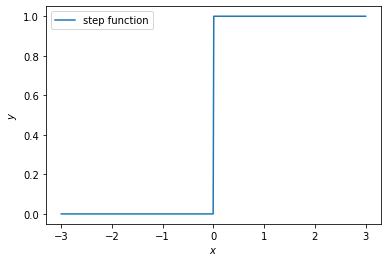

In [3]:
def step_func(x):
    return 0 if x<0 else 1

xm = -3
xs = np.linspace(-xm, xm, 500)
plt.plot(xs, [step_func(x) for x in xs], label="step function")
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

# 3.2 活性化関数

関数$h$として、異なる形状の関数を用いることもできます。例えば、恒等関数やシグモイド関数、ReLU関数などが使われています。
$$
\begin{align}
h(x) &= x \ \ \ &\mathrm{(identity)} \\
h(x) &= \frac{1}{1 + \exp(-x)} \ \ \ &\mathrm{(sigmoid)} \\
h(x) &=   \begin{cases}
    0 \ \ \ (x<0)\\
    x \ \ \  (x>0)
  \end{cases} \ \ \ &\mathrm{(ReLu)} \\ 
\end{align}
$$

Text(0, 0.5, '$y$')

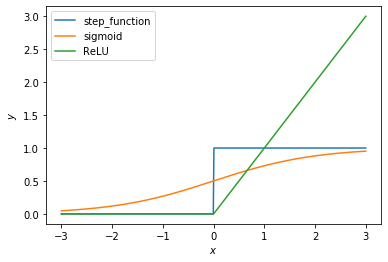

In [4]:
def step_func(x):
    return 0 if x<0 else 1

def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def relu(x):
    return np.max([0, x])

xm = -3
xs = np.linspace(-xm, xm, 500)
plt.plot(xs, [step_func(x) for x in xs], label="step_function")
plt.plot(xs, [sigmoid(x) for x in xs], label="sigmoid")
plt.plot(xs, [relu(x) for x in xs], label="ReLU")
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

## 3.3 多次元配列の計算

二層のニューラルネットワークの計算を活性関数を抜きに愚直に表現すると次のようになります。(テキスト図3-14)
$$
y_1 = w_{11}x_1 + w_{12}x_2 + b_1 \\
y_2 = w_{21}x_1 + w_{22}x_2 + b_2 \\
y_3 = w_{31}x_1 + w_{32}x_2 + b_3
$$

ニューラルネットワークの計算は頻出する一方で、表記は煩雑です。そこで、行列とベクトルを用いて次のように簡略化します。
$$
{\bf y} = {\bf Wx} + {\bf b} \\
$$

ここで、次のような表記を導入しています。
$$
{\bf x} = (x_1, x_2) \\
{\bf y} = (y_1, y_2, y_3) \\
{\bf b} = (b_1, b_2, b_3) \\
{\bf W} = \left(
    \begin{array}{cc}
      w_{11} & w_{12} \\
      w_{21} & w_{22} 
    \end{array}
  \right)
$$

活性関数を合わせて考えると、ニューラルネットワークの計算は上記の行列計算(線形)と活性関数（非線形）の計算を交互に繰り返して最終的な出力を計算します。

In [43]:
class network():
    def __init__(self):
        self.W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.b1 = np.array([0.1, 0.2, 0.3])
        self.W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.b2 = np.array([0.1, 0.2])
        self.W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.b3 = np.array([0.1, 0.2])
        
    def forward(self, x):
        a1 = np.dot(x, self.W1) + self.b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, self.W3) + self.b3
        y = a3
        return y
        
network0 = network()
x = np.array([1.0, 0.5])
y = network0.forward(x)
print(y)

[0.31682708 0.69627909]
